# NHL Game Prediction Model Exploratory Data Analysis

The purpose of this notebook is to create visualisations and explore relationship between features and game results

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import hockey_scraper
import pickle
import time
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/all_games_multirolling_SVA_2.csv')

In [3]:
df = df.dropna()

In [4]:
df.shape

(4402, 155)

## Home Team Win %
The home team wins 54.09% of the time

In [5]:
htw = pd.DataFrame(df['Home_Team_Won'].value_counts(normalize = True)).reset_index()
htw['Home_Team_Won'] = htw['Home_Team_Won']*100
htw.iloc[0,0] = 'Home'
htw.iloc[1,0] = 'Away'
htw.rename(columns = {'index' : 'Home Or Away'}, inplace = True)

htw

,Home Or Away,Home_Team_Won
0,Home,54.08905
1,Away,45.91095


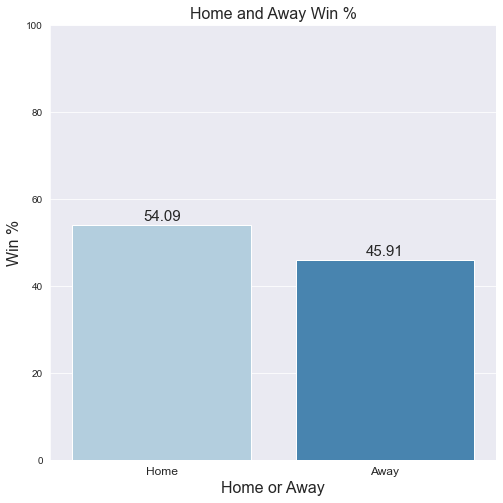

In [35]:
fig, ax = plt.subplots(figsize = (8,8))

ax = sns.barplot(x = htw['Home Or Away'], y = htw['Home_Team_Won'], orient = 'v', palette = 'Blues')
ax.set_title('Home and Away Win %', fontsize = 16)
ax.set_ylabel('Win %', fontsize =16)
ax.set_xlabel('Home or Away', fontsize = 16)
ax.set_ylim(0,100)
plt.xticks(fontsize =12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [68]:
# conditions = [((df['date'] >= '2017-10-04') & (df['date'] <= '2018-04-08')),
#               ((df['date'] >= '2018-10-03') & (df['date'] <= '2019-04-06')),
#               ((df['date'] >= '2019-10-02') & (df['date'] <= '2020-03-12')),
#               ((df['date'] >= '2021-01-13') & (df['date'] <= '2021-04-29'))
#              ]
# , 
# choices = ['2017-2018',
#            '2018-2019',
#            '2019-2020',
#            '2020-2021']
           
    

# df['Season'] = np.select(conditions, choices)

In [8]:
htw_season = pd.DataFrame(df.groupby('Season')['Home_Team_Won'].value_counts(normalize = 'True'))

In [9]:
htw_s = htw_season.unstack()['Home_Team_Won']

In [10]:
htw_s = htw_s.rename(columns = {0: 'Away', 1: 'Home'})
htw_s 

Home_Team_Won,Away,Home
Season,,
2017-2018,0.439480,0.560520
2018-2019,0.462992,0.537008
2019-2020,0.467160,0.532840
2020-2021,0.471951,0.528049


I suspected that home team win % would be down in the 2021 season, it seems like it may have been trending downward prior to that as well.

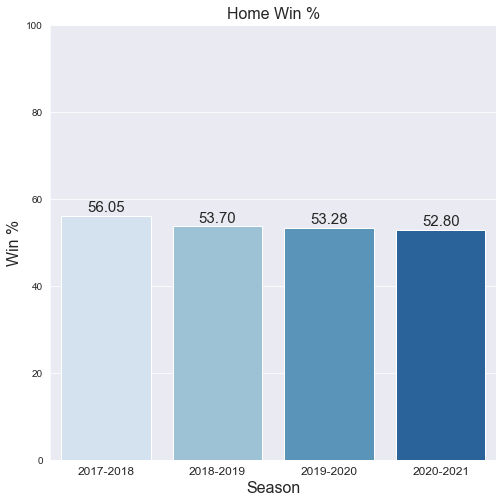

In [33]:
fig, ax = plt.subplots(figsize = (8,8))

ax = sns.barplot(x = df['Season'], y = df['Home_Team_Won'].apply(lambda x: x*100), palette = 'Blues', ci=None)

ax.set_title('Home Win %', fontsize = 16)
ax.set_ylabel('Win %', fontsize = 16)
ax.set_xlabel('Season', fontsize = 16)
ax.set_ylim(0,100)
plt.xticks(fontsize =12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

## Back to Back Analysis

In [12]:
df.head()

,Unnamed: 0,game_id,date,venue,home_team,away_team,start_time,home_score,away_score,status,Home_Team_Won,Home_Team_Key,Away_Team_Key,home_goalie,home_Goalie_FenwickSV%,home_Goalie_GSAx/60,home_Goalie_HDCSV%,away_goalie,away_Goalie_FenwickSV%,away_Goalie_GSAx/60,away_Goalie_HDCSV%,home_Game_Number,home_Team_Key,home_last_3_FF%_5v5,home_last_3_GF%_5v5,home_last_3_xGF%_5v5,home_last_3_SH%,home_last3_pp_TOI_per_game,home_last3_xGF_per_min_pp,home_last3_GF_per_min_pp,home_last3_pk_TOI_per_game,home_last3_xGA_per_min_pk,home_last3_GA_per_min_pk,home_Last_Game_Date,home_Days_Since_Last_Game,home_B2B,home_last_5_FF%_5v5,home_last_5_GF%_5v5,home_last_5_xGF%_5v5,home_last_5_SH%,home_last5_pp_TOI_per_game,home_last5_xGF_per_min_pp,home_last5_GF_per_min_pp,home_last5_pk_TOI_per_game,home_last5_xGA_per_min_pk,home_last5_GA_per_min_pk,home_last_10_FF%_5v5,home_last_10_GF%_5v5,home_last_10_xGF%_5v5,home_last_10_SH%,home_last10_pp_TOI_per_game,home_last10_xGF_per_min_pp,home_last10_GF_per_min_pp,home_last10_pk_TOI_per_game,home_last10_xGA_per_min_pk,home_last10_GA_per_min_pk,home_last_20_FF%_5v5,home_last_20_GF%_5v5,home_last_20_xGF%_5v5,home_last_20_SH%,home_last20_pp_TOI_per_game,home_last20_xGF_per_min_pp,home_last20_GF_per_min_pp,home_last20_pk_TOI_per_game,home_last20_xGA_per_min_pk,home_last20_GA_per_min_pk,home_last_30_FF%_5v5,home_last_30_GF%_5v5,home_last_30_xGF%_5v5,home_last_30_SH%,home_last30_pp_TOI_per_game,home_last30_xGF_per_min_pp,home_last30_GF_per_min_pp,home_last30_pk_TOI_per_game,home_last30_xGA_per_min_pk,home_last30_GA_per_min_pk,home_last_40_FF%_5v5,home_last_40_GF%_5v5,home_last_40_xGF%_5v5,home_last_40_SH%,home_last40_pp_TOI_per_game,home_last40_xGF_per_min_pp,home_last40_GF_per_min_pp,home_last40_pk_TOI_per_game,home_last40_xGA_per_min_pk,home_last40_GA_per_min_pk,away_Game_Number,away_Team_Key,away_last_3_FF%_5v5,away_last_3_GF%_5v5,away_last_3_xGF%_5v5,away_last_3_SH%,away_last3_pp_TOI_per_game,away_last3_xGF_per_min_pp,away_last3_GF_per_min_pp,away_last3_pk_TOI_per_game,away_last3_xGA_per_min_pk,away_last3_GA_per_min_pk,away_Last_Game_Date,away_Days_Since_Last_Game,away_B2B,away_last_5_FF%_5v5,away_last_5_GF%_5v5,away_last_5_xGF%_5v5,away_last_5_SH%,away_last5_pp_TOI_per_game,away_last5_xGF_per_min_pp,away_last5_GF_per_min_pp,away_last5_pk_TOI_per_game,away_last5_xGA_per_min_pk,away_last5_GA_per_min_pk,away_last_10_FF%_5v5,away_last_10_GF%_5v5,away_last_10_xGF%_5v5,away_last_10_SH%,away_last10_pp_TOI_per_game,away_last10_xGF_per_min_pp,away_last10_GF_per_min_pp,away_last10_pk_TOI_per_game,away_last10_xGA_per_min_pk,away_last10_GA_per_min_pk,away_last_20_FF%_5v5,away_last_20_GF%_5v5,away_last_20_xGF%_5v5,away_last_20_SH%,away_last20_pp_TOI_per_game,away_last20_xGF_per_min_pp,away_last20_GF_per_min_pp,away_last20_pk_TOI_per_game,away_last20_xGA_per_min_pk,away_last20_GA_per_min_pk,away_last_30_FF%_5v5,away_last_30_GF%_5v5,away_last_30_xGF%_5v5,away_last_30_SH%,away_last30_pp_TOI_per_game,away_last30_xGF_per_min_pp,away_last30_GF_per_min_pp,away_last30_pk_TOI_per_game,away_last30_xGA_per_min_pk,away_last30_GA_per_min_pk,away_last_40_FF%_5v5,away_last_40_GF%_5v5,away_last_40_xGF%_5v5,away_last_40_SH%,away_last40_pp_TOI_per_game,away_last40_xGF_per_min_pp,away_last40_GF_per_min_pp,away_last40_pk_TOI_per_game,away_last40_xGA_per_min_pk,away_last40_GA_per_min_pk,home_Rating.A.Pre,away_Rating.A.Pre,B2B_Status,Season
0,0,2017020001,2017-10-04,Bell MTS Place,WPG,TOR,2017-10-04 23:00:00,2,7,Final,0,WPG_2017-10-04,TOR_2017-10-04,Steve Mason,0.937294,-0.202922,0.858462,Frederik Andersen,0.942516,0.082345,0.873171,1.0,WPG_2017-10-04,52.073795,62.416999,48.839009,10.258649,3.444444,0.063871,0.193548,4.005556,0.090707,0.000000,2017-04-08 00:00:00,179 days 00:00:00.000000000,0.0,52.399869,57.080799,51.663405,9.426112,4.190000,0.079714,0.095465,3.693333,0.098556,0.054152,50.977189,50.738779,51.924105,7.380972,5.128333,0.091453,0.136497,4.315000,0.128158,0.092700,49.296838,51.281437,51.260619,8.999958,5.860833,0.102801,0.119437,5.44

In [17]:
b2b = df.groupby('B2B_Status').agg({'Home_Team_Won': 'mean'}).sort_values('Home_Team_Won', ascending = False)
b2b

,Home_Team_Won
B2B_Status,
Away_only,0.584795
Neither,0.540148
Both,0.507143
Home_only,0.450000


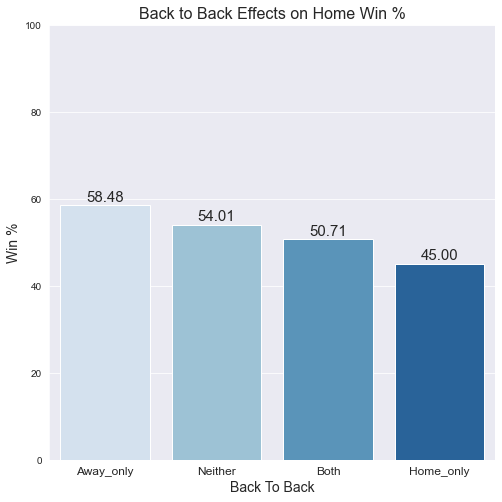

In [30]:
fig, ax = plt.subplots(figsize = (8,8))

ax = sns.barplot(x = b2b.index, y = b2b['Home_Team_Won'].apply(lambda x: x*100), orient = 'v', palette = 'Blues')
ax.set_title('Back to Back Effects on Home Win %', fontsize = 16)
ax.set_ylabel('Win %', fontsize =14)
ax.set_xlabel('Back To Back', fontsize =14)
plt.xticks(fontsize =12)
ax.set_ylim(0,100)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

Looking that the B2B effect on home win% it appears that the home team playing on a back to back has a much bigger effect than when the away team is playing in a back to back. I am unsure of the causation behind this. 

## Team Feature Analysis

The below distribution plots show that although there is a difference in distributions of team stats between the winning and losing teams in a game, the differences are small. Intuitively, the NHL regular season has a lot of parity and any team can win any game and frequently the underdogs do win. I do generally see strong relationships with the data from the last 40 rolling games relative to the last 5.

Stat definitions and calculations are courtesy of [Natural Stat Trick](https://www.naturalstattrick.com/glossary.php?teams)  

With the expception of the explicit PP and PK stats, all team stats are measured at 5v5 and are score and are [score and venue adjusted](https://www.tsn.ca/talent/score-effects-provide-critical-context-in-stats-analysis-1.365877)

First I will create a dataframe that that identifies the winning and losing team's stats instead of home vs away.

In [62]:
df_home_winner = df[df['Home_Team_Won'] == 1].loc[:,['game_id',
 'date',
 'venue',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'Home_Team_Won',
 'home_Goalie_FenwickSV%',
 'home_Goalie_GSAx/60',
 'home_Goalie_HDCSV%',
 'away_Goalie_FenwickSV%',
 'away_Goalie_GSAx/60',
 'away_Goalie_HDCSV%',
 'home_Game_Number',
 'home_B2B',
 'home_last_5_FF%_5v5',
 'home_last_5_GF%_5v5',
 'home_last_5_xGF%_5v5',
 'home_last_5_SH%',
 'home_last5_pp_TOI_per_game',
 'home_last5_xGF_per_min_pp',
 'home_last5_pk_TOI_per_game',
 'home_last5_xGA_per_min_pk',
 'home_last_40_FF%_5v5',
 'home_last_40_GF%_5v5',
 'home_last_40_xGF%_5v5',
 'home_last_40_SH%',
 'home_last40_pp_TOI_per_game',
 'home_last40_xGF_per_min_pp',
 'home_last40_pk_TOI_per_game',
 'home_last40_xGA_per_min_pk',
 'away_Game_Number',
 'away_B2B',
 'away_last_5_FF%_5v5',
 'away_last_5_GF%_5v5',
 'away_last_5_xGF%_5v5',
 'away_last_5_SH%',
 'away_last5_pp_TOI_per_game',
 'away_last5_xGF_per_min_pp',
 'away_last5_pk_TOI_per_game',
 'away_last5_xGA_per_min_pk',
 'away_last_40_FF%_5v5',
 'away_last_40_GF%_5v5',
 'away_last_40_xGF%_5v5',
 'away_last_40_SH%',
 'away_last40_pp_TOI_per_game',
 'away_last40_xGF_per_min_pp',
 'away_last40_pk_TOI_per_game',
 'away_last40_xGA_per_min_pk',
 'home_Rating.A.Pre',
 'away_Rating.A.Pre',
 'B2B_Status',
 'Season']]
                                             
                                           

In [63]:
df_away_winner = df[df['Home_Team_Won'] == 0].loc[:,['game_id',
 'date',
 'venue',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'Home_Team_Won',
 'home_Goalie_FenwickSV%',
 'home_Goalie_GSAx/60',
 'home_Goalie_HDCSV%',
 'away_Goalie_FenwickSV%',
 'away_Goalie_GSAx/60',
 'away_Goalie_HDCSV%',
 'home_Game_Number',
 'home_B2B',
 'home_last_5_FF%_5v5',
 'home_last_5_GF%_5v5',
 'home_last_5_xGF%_5v5',
 'home_last_5_SH%',
 'home_last5_pp_TOI_per_game',
 'home_last5_xGF_per_min_pp',
 'home_last5_pk_TOI_per_game',
 'home_last5_xGA_per_min_pk',
 'home_last_40_FF%_5v5',
 'home_last_40_GF%_5v5',
 'home_last_40_xGF%_5v5',
 'home_last_40_SH%',
 'home_last40_pp_TOI_per_game',
 'home_last40_xGF_per_min_pp',
 'home_last40_pk_TOI_per_game',
 'home_last40_xGA_per_min_pk',
 'away_Game_Number',
 'away_B2B',
 'away_last_5_FF%_5v5',
 'away_last_5_GF%_5v5',
 'away_last_5_xGF%_5v5',
 'away_last_5_SH%',
 'away_last5_pp_TOI_per_game',
 'away_last5_xGF_per_min_pp',
 'away_last5_pk_TOI_per_game',
 'away_last5_xGA_per_min_pk',
 'away_last_40_FF%_5v5',
 'away_last_40_GF%_5v5',
 'away_last_40_xGF%_5v5',
 'away_last_40_SH%',
 'away_last40_pp_TOI_per_game',
 'away_last40_xGF_per_min_pp',
 'away_last40_pk_TOI_per_game',
 'away_last40_xGA_per_min_pk',
 'home_Rating.A.Pre',
 'away_Rating.A.Pre',
 'B2B_Status',
 'Season']]

In [64]:
a = ['game_id',
 'date',
 'venue',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'Home_Team_Won',
 'home_Goalie_FenwickSV%',
 'home_Goalie_GSAx/60',
 'home_Goalie_HDCSV%',
 'away_Goalie_FenwickSV%',
 'away_Goalie_GSAx/60',
 'away_Goalie_HDCSV%',
 'home_Game_Number',
 'home_B2B',
 'home_last_5_FF%_5v5',
 'home_last_5_GF%_5v5',
 'home_last_5_xGF%_5v5',
 'home_last_5_SH%',
 'home_last5_pp_TOI_per_game',
 'home_last5_xGF_per_min_pp',
 'home_last5_pk_TOI_per_game',
 'home_last5_xGA_per_min_pk',
 'home_last_40_FF%_5v5',
 'home_last_40_GF%_5v5',
 'home_last_40_xGF%_5v5',
 'home_last_40_SH%',
 'home_last40_pp_TOI_per_game',
 'home_last40_xGF_per_min_pp',
 'home_last40_pk_TOI_per_game',
 'home_last40_xGA_per_min_pk',
 'away_Game_Number',
 'away_B2B',
 'away_last_5_FF%_5v5',
 'away_last_5_GF%_5v5',
 'away_last_5_xGF%_5v5',
 'away_last_5_SH%',
 'away_last5_pp_TOI_per_game',
 'away_last5_xGF_per_min_pp',
 'away_last5_pk_TOI_per_game',
 'away_last5_xGA_per_min_pk',
 'away_last_40_FF%_5v5',
 'away_last_40_GF%_5v5',
 'away_last_40_xGF%_5v5',
 'away_last_40_SH%',
 'away_last40_pp_TOI_per_game',
 'away_last40_xGF_per_min_pp',
 'away_last40_pk_TOI_per_game',
 'away_last40_xGA_per_min_pk',
 'home_Rating.A.Pre',
 'away_Rating.A.Pre',
 'B2B_Status',
 'Season']

In [65]:
b = ['game_id',
 'date',
 'venue',
 'winner_team',
 'loser_team',
 'winner_score',
 'loser_score',
 'winner_Team_Won',
 'winner_Goalie_FenwickSV%',
 'winner_Goalie_GSAx/60',
 'winner_Goalie_HDCSV%',
 'loser_Goalie_FenwickSV%',
 'loser_Goalie_GSAx/60',
 'loser_Goalie_HDCSV%',
 'winner_Game_Number',
 'winner_B2B',
 'winner_last_5_FF%_5v5',
 'winner_last_5_GF%_5v5',
 'winner_last_5_xGF%_5v5',
 'winner_last_5_SH%',
 'winner_last5_pp_TOI_per_game',
 'winner_last5_xGF_per_min_pp',
 'winner_last5_pk_TOI_per_game',
 'winner_last5_xGA_per_min_pk',
 'winner_last_40_FF%_5v5',
 'winner_last_40_GF%_5v5',
 'winner_last_40_xGF%_5v5',
 'winner_last_40_SH%',
 'winner_last40_pp_TOI_per_game',
 'winner_last40_xGF_per_min_pp',
 'winner_last40_pk_TOI_per_game',
 'winner_last40_xGA_per_min_pk',
 'loser_Game_Number',
 'loser_B2B',
 'loser_last_5_FF%_5v5',
 'loser_last_5_GF%_5v5',
 'loser_last_5_xGF%_5v5',
 'loser_last_5_SH%',
 'loser_last5_pp_TOI_per_game',
 'loser_last5_xGF_per_min_pp',
 'loser_last5_pk_TOI_per_game',
 'loser_last5_xGA_per_min_pk',
 'loser_last_40_FF%_5v5',
 'loser_last_40_GF%_5v5',
 'loser_last_40_xGF%_5v5',
 'loser_last_40_SH%',
 'loser_last40_pp_TOI_per_game',
 'loser_last40_xGF_per_min_pp',
 'loser_last40_pk_TOI_per_game',
 'loser_last40_xGA_per_min_pk',
 'winner_Rating.A.Pre',
 'loser_Rating.A.Pre',
 'B2B_Status',
 'Season']

In [66]:
c =  ['game_id',
 'date',
 'venue',
 'loser_team',
 'winner_team',
 'loser_score',
 'winner_score',
 'loser_Team_Won',
 'loser_Goalie_FenwickSV%',
 'loser_Goalie_GSAx/60',
 'loser_Goalie_HDCSV%',
 'winner_Goalie_FenwickSV%',
 'winner_Goalie_GSAx/60',
 'winner_Goalie_HDCSV%',
 'loser_Game_Number',
 'loser_B2B',
 'loser_last_5_FF%_5v5',
 'loser_last_5_GF%_5v5',
 'loser_last_5_xGF%_5v5',
 'loser_last_5_SH%',
 'loser_last5_pp_TOI_per_game',
 'loser_last5_xGF_per_min_pp',
 'loser_last5_pk_TOI_per_game',
 'loser_last5_xGA_per_min_pk',
 'loser_last_40_FF%_5v5',
 'loser_last_40_GF%_5v5',
 'loser_last_40_xGF%_5v5',
 'loser_last_40_SH%',
 'loser_last40_pp_TOI_per_game',
 'loser_last40_xGF_per_min_pp',
 'loser_last40_pk_TOI_per_game',
 'loser_last40_xGA_per_min_pk',
 'winner_Game_Number',
 'winner_B2B',
 'winner_last_5_FF%_5v5',
 'winner_last_5_GF%_5v5',
 'winner_last_5_xGF%_5v5',
 'winner_last_5_SH%',
 'winner_last5_pp_TOI_per_game',
 'winner_last5_xGF_per_min_pp',
 'winner_last5_pk_TOI_per_game',
 'winner_last5_xGA_per_min_pk',
 'winner_last_40_FF%_5v5',
 'winner_last_40_GF%_5v5',
 'winner_last_40_xGF%_5v5',
 'winner_last_40_SH%',
 'winner_last40_pp_TOI_per_game',
 'winner_last40_xGF_per_min_pp',
 'winner_last40_pk_TOI_per_game',
 'winner_last40_xGA_per_min_pk',
 'loser_Rating.A.Pre',
 'winner_Rating.A.Pre',
 'B2B_Status',
 'Season']

In [67]:
home_win_dict = {k:v for k,v in zip(a,b)}

In [68]:
away_win_dict = {k:v for k,v in zip(a,c)}

In [69]:
df_home_winner = df_home_winner.rename(columns = home_win_dict)

In [70]:
df_away_winner = df_away_winner.rename(columns = away_win_dict)

In [71]:
df_winner = pd.concat([df_home_winner, df_away_winner])

In [72]:
df_winner

,game_id,date,venue,winner_team,loser_team,winner_score,loser_score,winner_Team_Won,winner_Goalie_FenwickSV%,winner_Goalie_GSAx/60,winner_Goalie_HDCSV%,loser_Goalie_FenwickSV%,loser_Goalie_GSAx/60,loser_Goalie_HDCSV%,winner_Game_Number,winner_B2B,winner_last_5_FF%_5v5,winner_last_5_GF%_5v5,winner_last_5_xGF%_5v5,winner_last_5_SH%,winner_last5_pp_TOI_per_game,winner_last5_xGF_per_min_pp,winner_last5_pk_TOI_per_game,winner_last5_xGA_per_min_pk,winner_last_40_FF%_5v5,winner_last_40_GF%_5v5,winner_last_40_xGF%_5v5,winner_last_40_SH%,winner_last40_pp_TOI_per_game,winner_last40_xGF_per_min_pp,winner_last40_pk_TOI_per_game,winner_last40_xGA_per_min_pk,loser_Game_Number,loser_B2B,loser_last_5_FF%_5v5,loser_last_5_GF%_5v5,loser_last_5_xGF%_5v5,loser_last_5_SH%,loser_last5_pp_TOI_per_game,loser_last5_xGF_per_min_pp,loser_last5_pk_TOI_per_game,loser_last5_xGA_per_min_pk,loser_last_40_FF%_5v5,loser_last_40_GF%_5v5,loser_last_40_xGF%_5v5,loser_last_40_SH%,loser_last40_pp_TOI_per_game,loser_last40_xGF_per_min_pp,loser_last40_pk_TOI_per_game,loser_last40_xGA_per_min_pk,winner_Rating.A.Pre,loser_Rating.A.Pre,B2B_Status,Season,loser_Team_Won
2,2017020003,2017-10-04,Rogers Place,EDM,CGY,3,0,1.0,0.942492,0.302087,0.897778,0.938246,-0.097423,0.878613,1.0,0.0,60.511924,58.385392,60.180542,8.478124,6.283333,0.113316,4.540000,0.131278,50.407241,56.575634,49.851785,9.025460,4.682500,0.132248,4.233750,0.116445,1.0,0.0,43.520998,45.427286,40.305523,9.286882,4.816667,0.153218,5.853333,0.112415,50.595552,50.499508,49.136336,7.879167,4.921667,0.120843,5.185417,0.107127,1522.11,1496.85,Neither,2017-2018,NaN
4,2017020005,2017-10-05,TD Garden,BOS,NSH,4,3,1.0,0.933383,-0.310233,0.830721,0.939698,-0.346771,0.839117,1.0,0.0,52.400715,48.959081,50.929752,5.518246,2.690000,0.098885,5.446667,0.067197,55.762037,48.882718,54.871795,7.303942,4.482083,0.129293,5.193333,0.084868,1.0,0.0,47.102597,52.130045,43.637300,7.311321,6.066667,0.142088,3.630000,0.107438,51.309591,52.122642,50.381002,7.885816,4.720833,0.087855,4.475833,0.102718,1521.29,1545.81,Neither,2017-2018,NaN
8,2017020009,2017-10-05,Little Caesars Arena,DET,MIN,4,2,1.0,0.948798,0.284811,0.896154,0.933377,-0.705548,0.860248,1.0,0.0,49.469527,43.239152,49.469777,6.430072,2.510000,0.112351,3.403333,0.061704,47.614221,45.950027,47.403962,7.820550,4.629167,0.105797,4.516667,0.119336,1.0,0.0,57.868703,58.964646,63.606735,8.788107,2.510000,0.183267,4.340000,0.124885,51.867753,51.540585,56.750434,8.686489,4.518333,0.117411,3.872500,0.107618,1462.30,1528.70,Neither,2017-2018,NaN
9,2017020010,2017-10-05,United Center,CHI,PIT,10,1,1.0,0.936754,-0.095325,0.869469,0.940134,0.075466,0.878220,1.0,0.0,50.806103,46.941896,50.291159,4.933708,5.416667,0.060185,4.766667,0.135944,52.514084,54.663774,51.617421,8.719886,4.422917,0.103156,4.016250,0.122004,2.0,1.0,43.579393,59.569075,47.208791,13.494114,4.120000,0.145631,3.683333,0.145520,50.626887,57.691589,51.992249,8.968961,4.822500,0.126439,4.735833,0.129386,1526.69,1574.06,Away_only,2017-2018,NaN
10,2017020011,2017-10-05,Honda Center,ANA,ARI,5,4,1.0,0.948342,0.498419,0.887872,0.935024,-0.334400,0.887195,1.0,0.0,49.417381,68.576826,52.396338,11.227962,4.983333,0.136856,6.393333,0.106048,50.911497,57.369897,53.183916,7.634332,4.753333,0.128489,5.619583,0.130036,1.0,0.0,39.440893,58.343195,38.957550,10.399747,2.033333,0.103279,4.666667,0.186429,43.028883,45.314202,41.522074,8.102443,4.580833,0.084755,4.815417,0.140279,1540.88,1442.12,Neither,2017-2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,2020020834,2021-05-05,Scotiabank Saddledome,WPG,CGY,4,0,NaN,0.937008,0.116980,0.872798,0.930481,-0.445209,0.846154,32.0,0.0,47.529993,30.895795,44.224830,5.383309,5.800000,0.088621,4.406667,0.192436,47.909345,51.155951,46.039604,8.299948,4.761250,0.121817,4.523333,0.124632,31.0,0.0,55.081685,61.946351,5

In [74]:
df.shape

(4402, 155)

In [73]:
#check to see that everything merged correctly
(df_winner['winner_score'] > df_winner['loser_score']).count()

4402

### Fenwick For %
Per NST, Fenwick is any unblocked shot attempt (goals, shots on net and misses) outside of the shootout. Referred to as USAT by the NHL.  

Fenwick For % is the percentage of total Fenwick in games that team played that are for that team. FF*100/(FF+FA)  

Fenwick For % is used as a proxy to measure offensive zone possession. A Fenwick For % above 50% indicates that the team is possesing the puck more in the offensive zone than their opponents and is thus a better team.

In general, we can see that teams with higher FF% are winning more frequently. The 40 game rolling FF% shows a strong relationship than 5 game rolling.

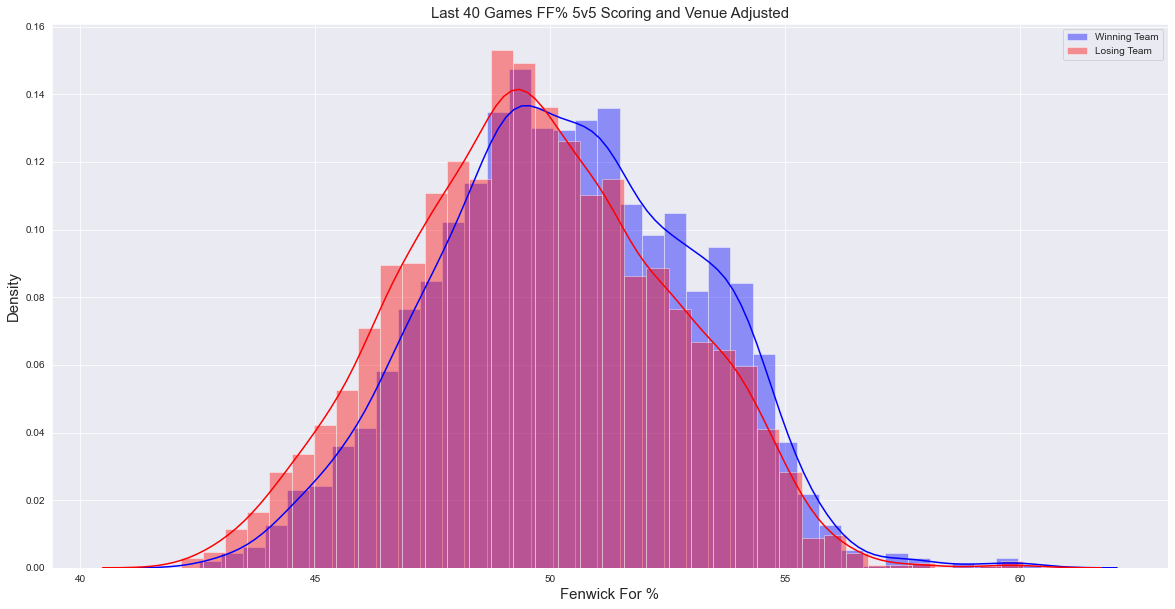

In [75]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last_40_FF%_5v5'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last_40_FF%_5v5'], color = 'red', label = 'Losing Team')
# ax = sns.distplot(df[df['Bankrupt?']==1]['ROA(A) before interest and % after tax'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('Last 40 Games FF% 5v5 Scoring and Venue Adjusted', fontsize = 15)
ax.set_xlabel('Fenwick For %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

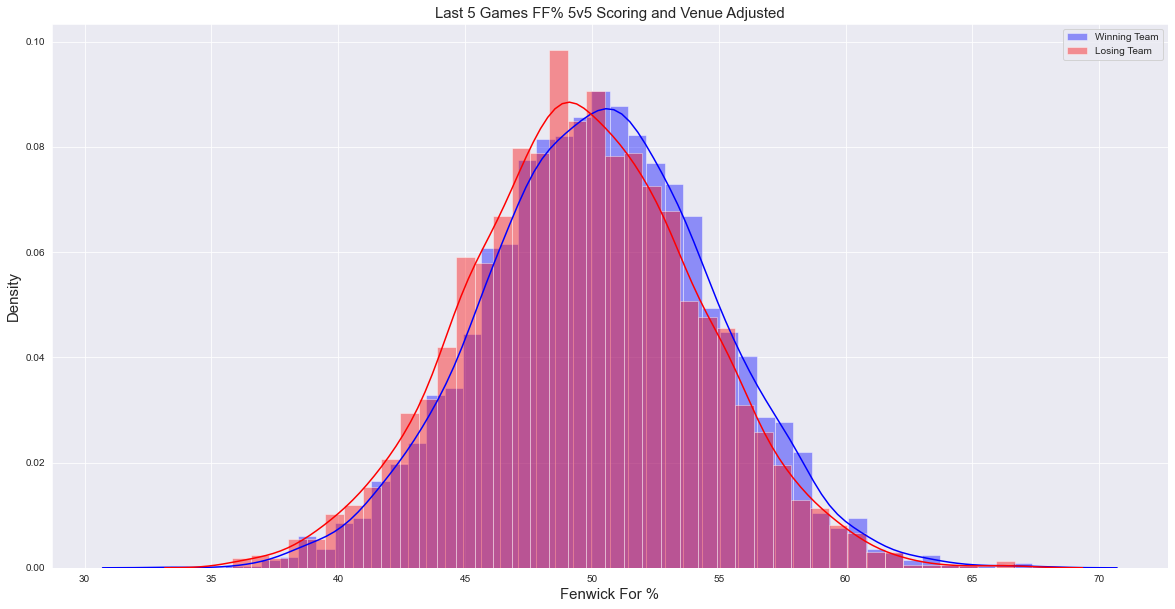

In [213]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last_5_FF%_5v5'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last_5_FF%_5v5'], color = 'red', label = 'Losing Team')
# ax = sns.distplot(df[df['Bankrupt?']==1]['ROA(A) before interest and % after tax'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('Last 5 Games FF% 5v5 Scoring and Venue Adjusted', fontsize = 15)
ax.set_xlabel('Fenwick For %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

### Goals For %

GF% is Percentage of total Goals in games that team played that are for that team. GF*100/(GF+GA)

This statistic is more traditional and intuitive. Over longer stretches, goal differential can be very predictive of team record and team strength.

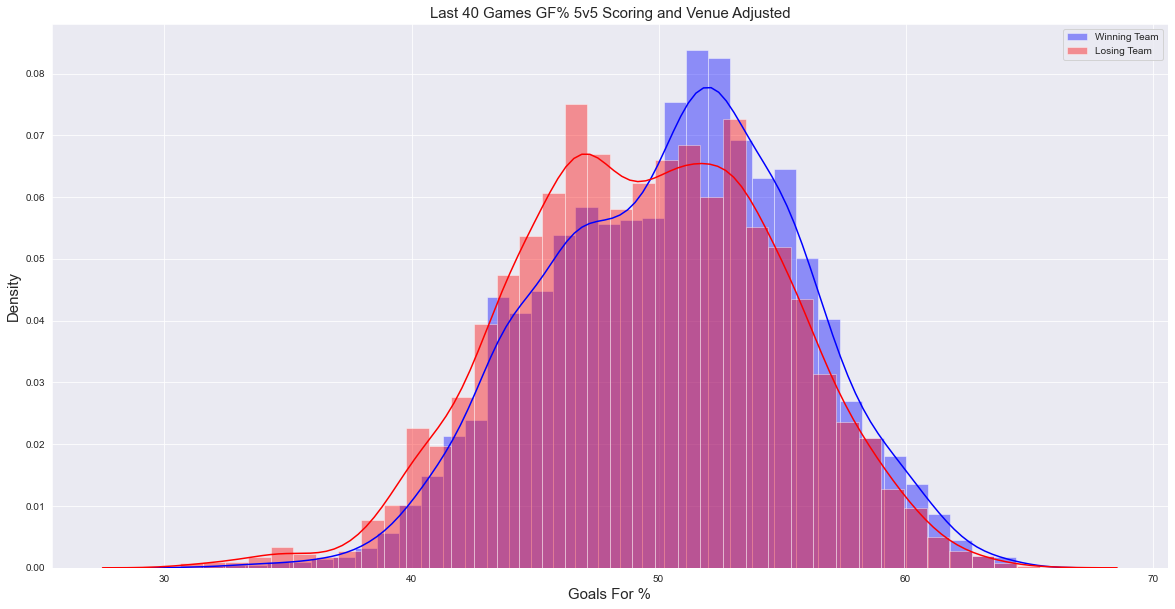

In [215]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last_40_GF%_5v5'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last_40_GF%_5v5'], color = 'red', label = 'Losing Team')
# ax = sns.distplot(df[df['Bankrupt?']==1]['ROA(A) before interest and % after tax'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('Last 40 Games GF% 5v5 Scoring and Venue Adjusted', fontsize = 15)
ax.set_xlabel('Goals For %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

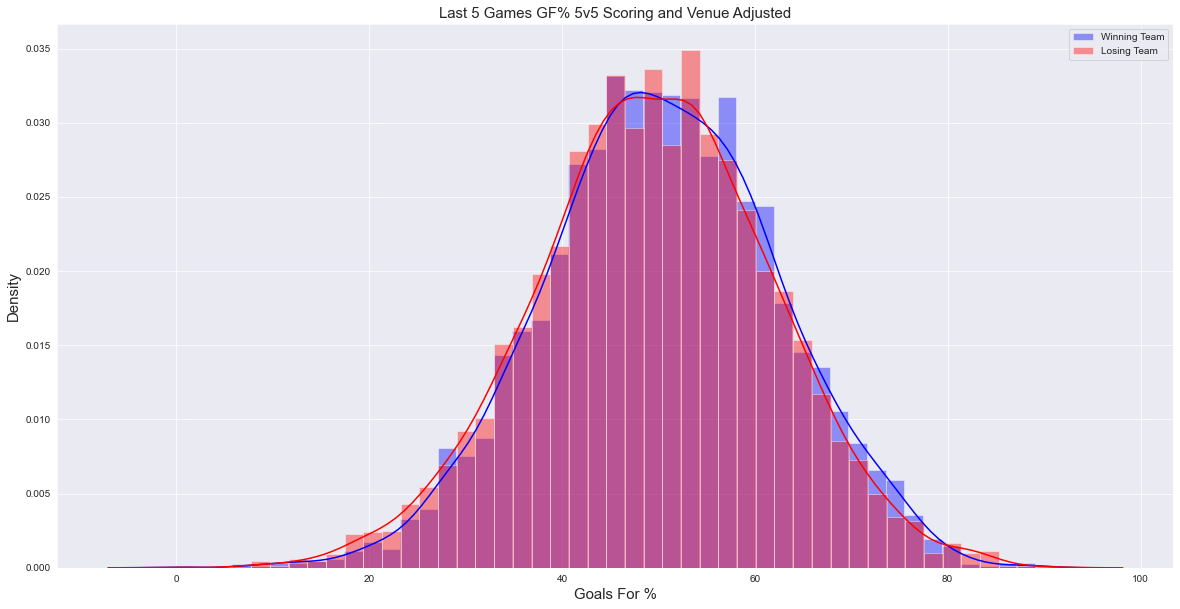

In [280]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last_5_GF%_5v5'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last_5_GF%_5v5'], color = 'red', label = 'Losing Team')
# ax = sns.distplot(df[df['Bankrupt?']==1]['ROA(A) before interest and % after tax'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('Last 5 Games GF% 5v5 Scoring and Venue Adjusted', fontsize = 15)
ax.set_xlabel('Goals For %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

### Expected Goals For %


Expected goals measure the expected goal value of of Fenwick shots. Natural Stat Trick has an internal model that measures this. 

Expected Goals For Percentage: xGF / (xGF + xGA)

xGF% measures a teams scoring chance generation. A higher xGF% is better, showing that the team had better scoring oppurtunites than their opponents.

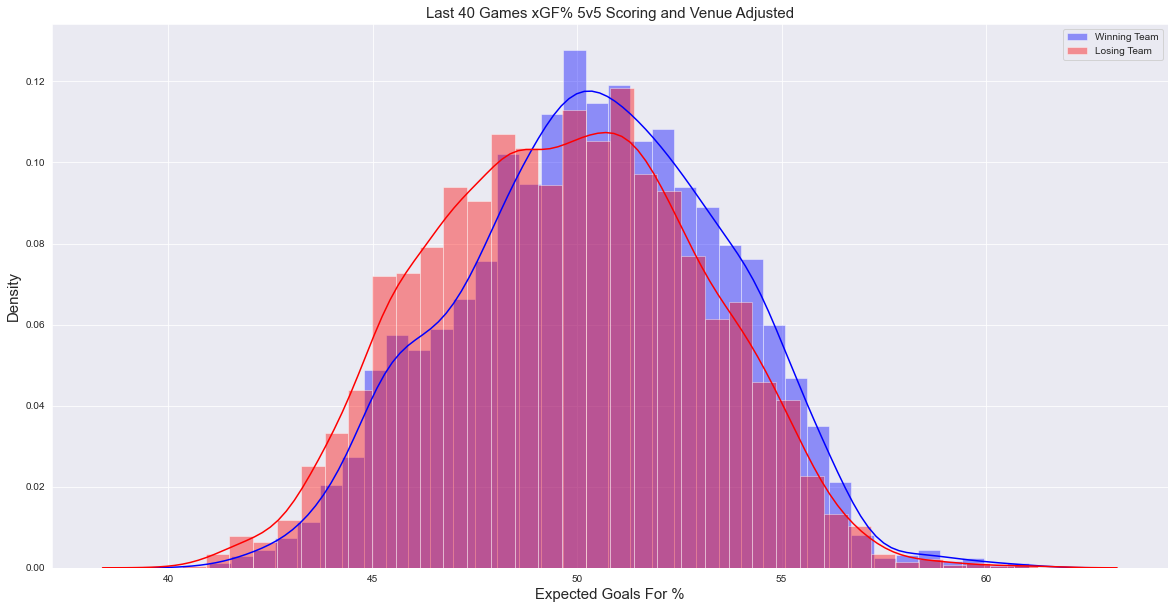

In [219]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last_40_xGF%_5v5'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last_40_xGF%_5v5'], color = 'red', label = 'Losing Team')

ax.set_title('Last 40 Games xGF% 5v5 Scoring and Venue Adjusted', fontsize = 15)
ax.set_xlabel('Expected Goals For %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

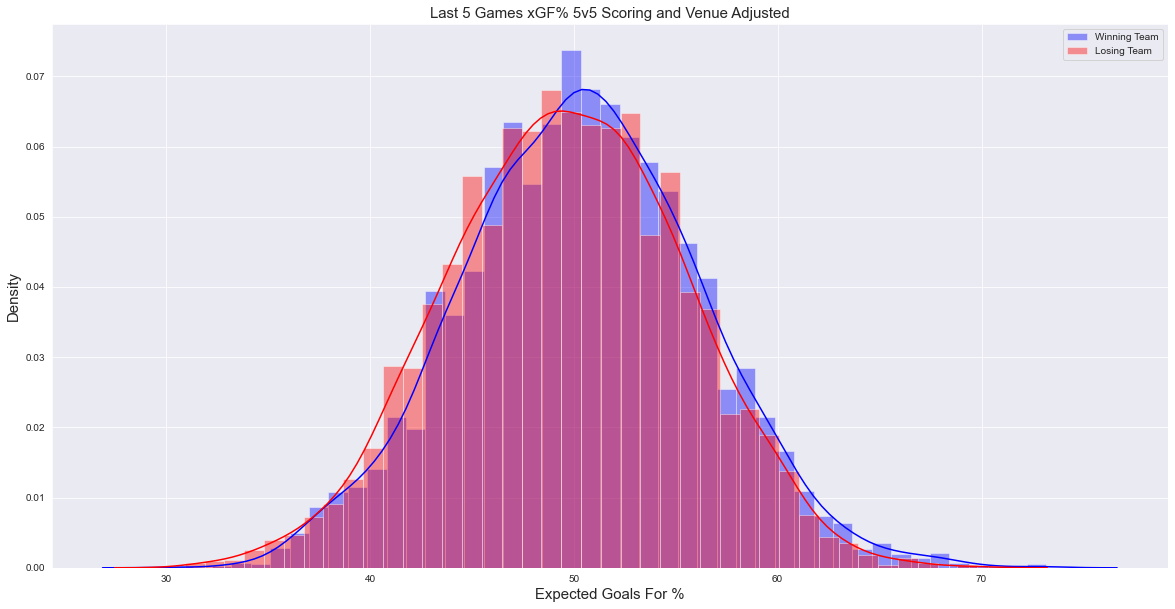

In [76]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last_5_xGF%_5v5'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last_5_xGF%_5v5'], color = 'red', label = 'Losing Team')

ax.set_title('Last 5 Games xGF% 5v5 Scoring and Venue Adjusted', fontsize = 15)
ax.set_xlabel('Expected Goals For %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

### Shooting %

SH% - Percentage of Shots for that team that were Goals. GF*100/SF

Shooting % measures a mix of shooting skill, chane quality, and luck

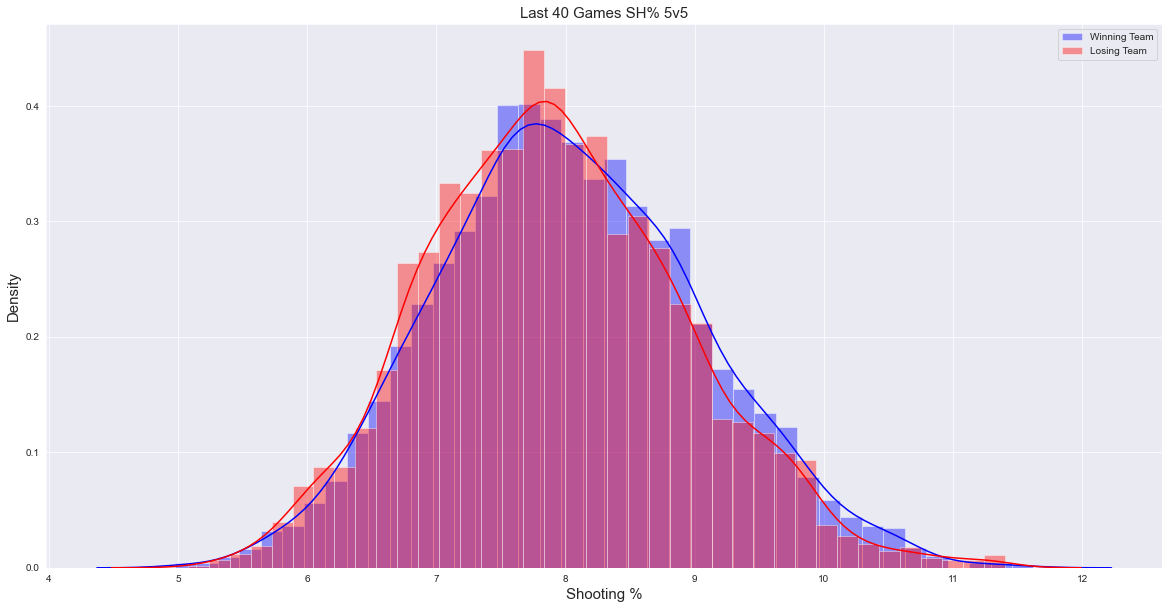

In [224]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last_40_SH%'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last_40_SH%'], color = 'red', label = 'Losing Team')

ax.set_title('Last 40 Games SH% 5v5', fontsize = 15)
ax.set_xlabel('Shooting %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

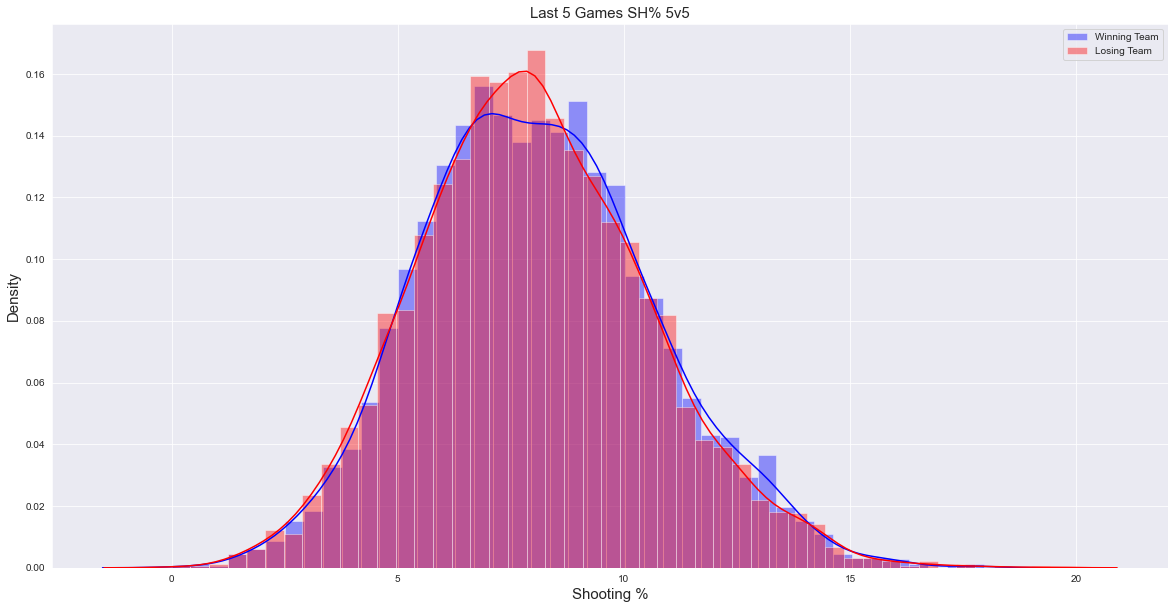

In [77]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last_5_SH%'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last_5_SH%'], color = 'red', label = 'Losing Team')

ax.set_title('Last 5 Games SH% 5v5', fontsize = 15)
ax.set_xlabel('Shooting %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

### ELO Rating
Elo ratings measure a team's strength over time, accounting for the strength of opponents, locations of games and margin of victory. Elo is traditionally used in board games like chess but has been adapted for NHL games. Elo rating were gathered from Neil Paine's [Github](https://github.com/NeilPaine538/NHL-Player-And-Team-Ratings)

Elo does appear to be one of the stronger predictors of team strength 

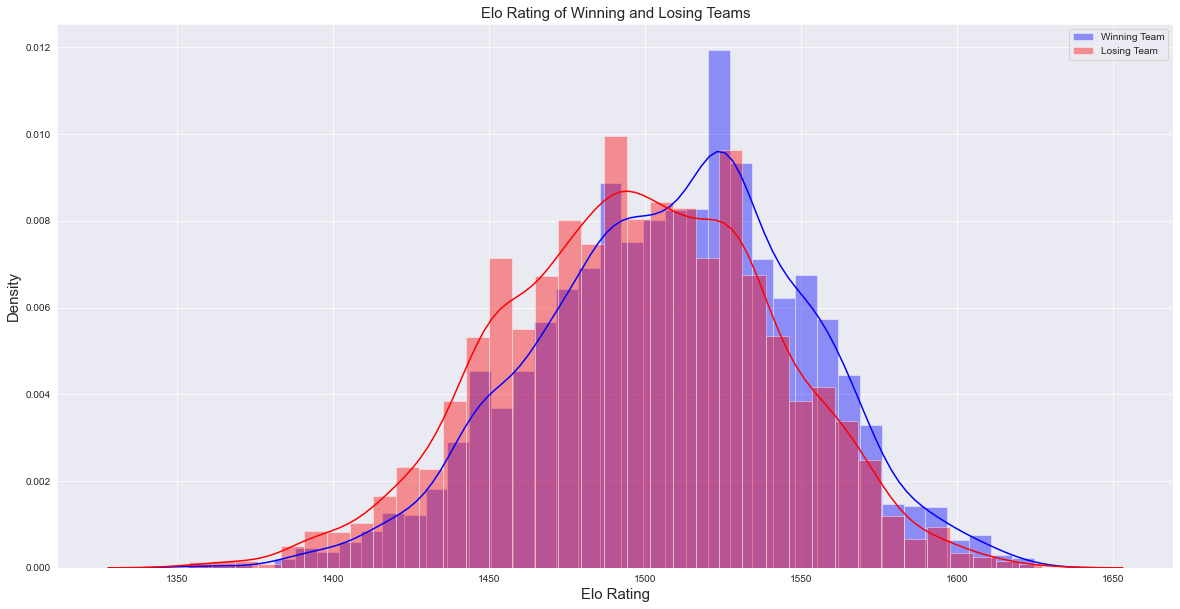

In [89]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_Rating.A.Pre'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_Rating.A.Pre'], color = 'red', label = 'Losing Team')

ax.set_title('Elo Rating of Winning and Losing Teams', fontsize = 15)
ax.set_xlabel('Elo Rating', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

### Special Teams


Special teams ability is important but not as important as 5v5 play. Only about 10 minutes per game . Only about 10 minutes (17%) of the game is played on special teams.  

The metric I engineered to measure Powerplay efficiency is xGF per minute of powerplay time. A higher number shows a team is stronger on the PP. Looking at the chart there is not much separting the distrbution of winning and losing team's PP efficiency.

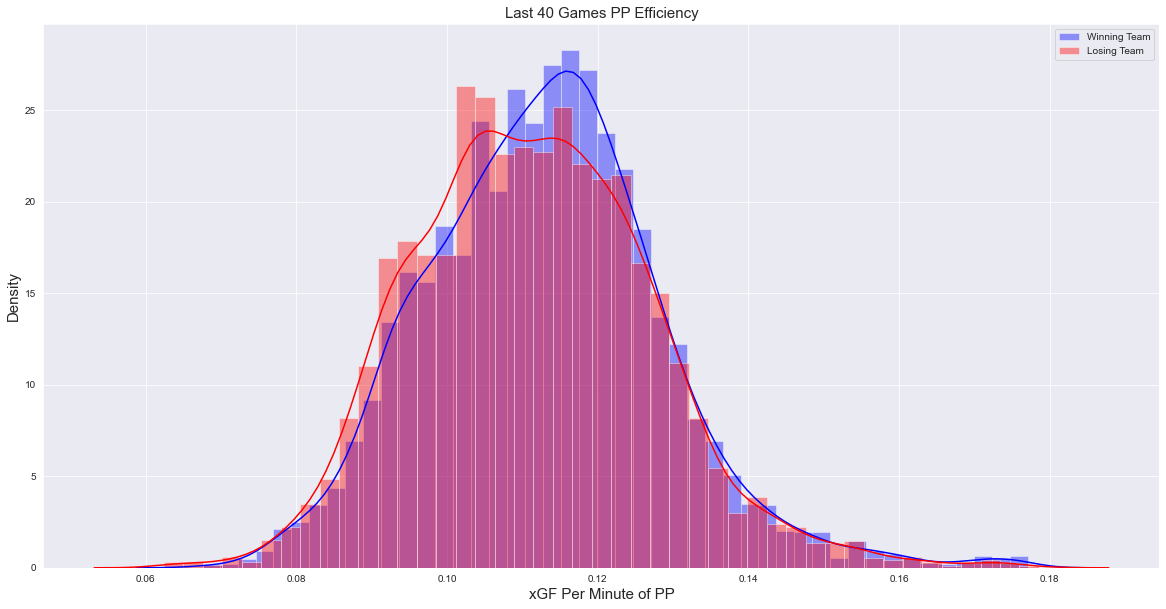

In [285]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last40_xGF_per_min_pp'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last40_xGF_per_min_pp'], color = 'red', label = 'Losing Team')

ax.set_title('Last 40 Games PP xGF Efficiency', fontsize = 15)
ax.set_xlabel('xGF Per Minute of PP', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

The metric I engineered for PK efficiency is xGA per minute of PK time. A lower number shows a team is better on the PK. Again, there is not much separating winning and losing team from their pK efficiency.

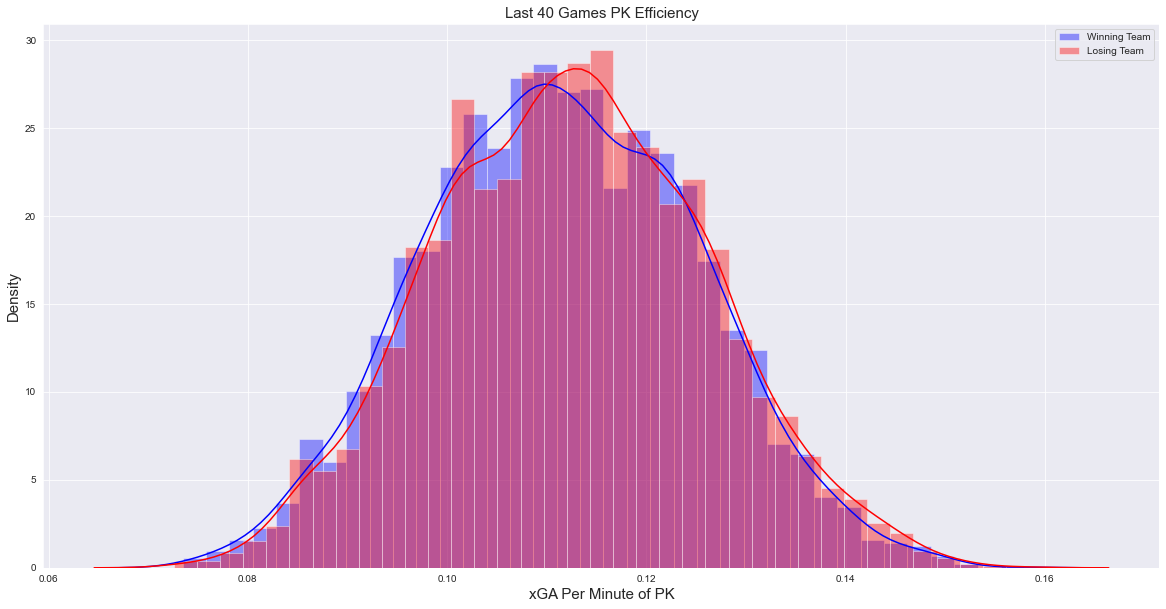

In [286]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner['winner_last40_xGA_per_min_pk'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner['loser_last40_xGA_per_min_pk'], color = 'red', label = 'Losing Team')

ax.set_title('Last 40 Games PK Efficiency', fontsize = 15)
ax.set_xlabel('xGA Per Minute of PK', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

## Goalie Feature Analysis

Goaltenders are the most important players on the ice in hockey. Good goaltending can carry a bad team to victory and conversely bad goaltending can sink a clearly superior team. 

The goaltending features used in the model are Fenwick Save %, Goals Saved Above Expected per 60, and High Danger Save %. Even still the distributions of winning vs losing teams is minimal

I had imputed stats for goalies who hadn't played at least 10 games in their career. I will remove these goalies for the sake of having more interpretable graphs.

In [82]:
infile = open("data/inexperienced_goalie_imputes.pickle",'rb')
ig = pickle.load(infile)
infile.close()

In [83]:
ig

[0.9350856996674342,
 -91.2399999999999,
 -0.2556941982582863,
 0.8620604259534423]

In [84]:
ig_FenwickSV, ig_GSAx , ig_GSAx60 , ig_HDCSV = ig[0], ig[1], ig[2], ig[3]

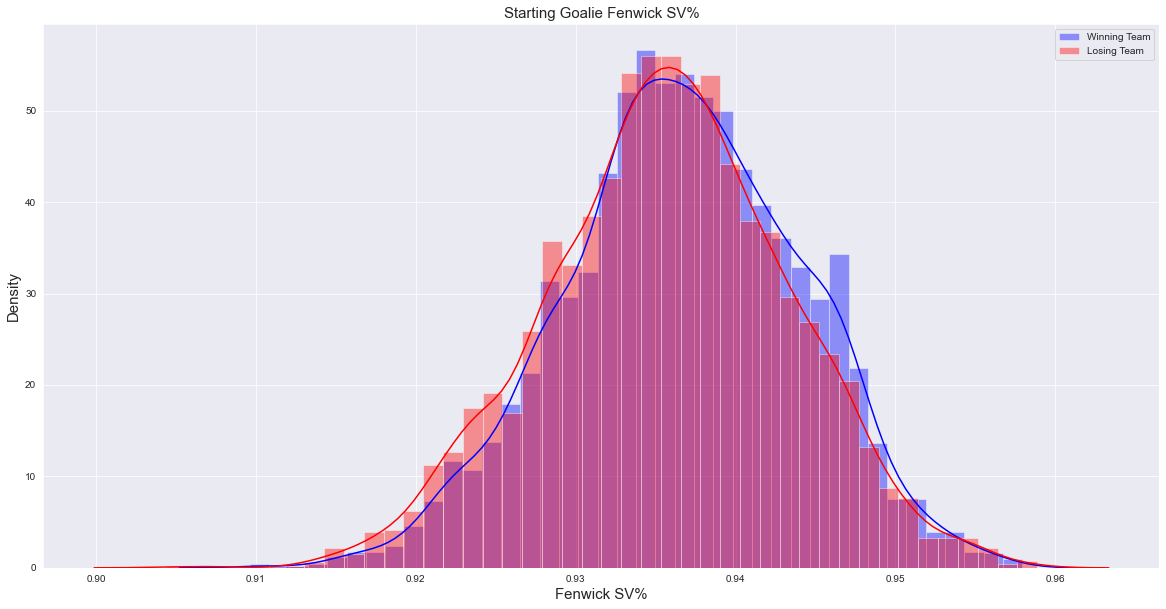

In [90]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner[df_winner['winner_Goalie_FenwickSV%'] != ig_FenwickSV]['winner_Goalie_FenwickSV%'] , color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner[df_winner['loser_Goalie_FenwickSV%'] != ig_FenwickSV]['loser_Goalie_FenwickSV%'], color = 'red', label = 'Losing Team')

ax.set_title('Starting Goalie Fenwick SV%', fontsize = 15)
ax.set_xlabel('Fenwick SV%', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [266]:
ig_GSAx60 = df_winner['winner_Goalie_GSAx/60'].mode()[0]

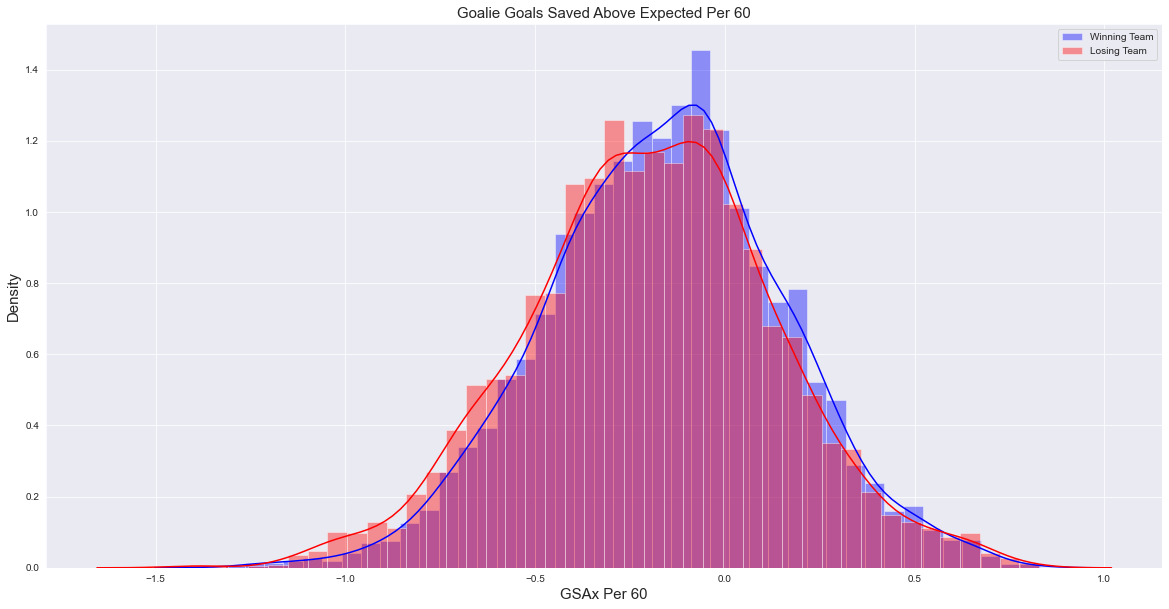

In [91]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner[df_winner['winner_Goalie_GSAx/60'] != ig_GSAx60]['winner_Goalie_GSAx/60'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner[df_winner['loser_Goalie_GSAx/60'] != ig_GSAx60]['loser_Goalie_GSAx/60'], color = 'red', label = 'Losing Team')

ax.set_title('Goalie Goals Saved Above Expected Per 60', fontsize = 15)
ax.set_xlabel('GSAx Per 60', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [274]:
df_winner[df_winner['winner_Goalie_HDCSV%'] != ig_HDCSV]

,game_id,date,venue,winner_team,loser_team,winner_score,loser_score,winner_Team_Won,winner_Goalie_FenwickSV%,winner_Goalie_GSAx/60,winner_Goalie_HDCSV%,loser_Goalie_FenwickSV%,loser_Goalie_GSAx/60,loser_Goalie_HDCSV%,winner_Game_Number,winner_B2B,winner_last_5_FF%_5v5,winner_last_5_GF%_5v5,winner_last_5_xGF%_5v5,winner_last_5_SH%,winner_last5_pp_TOI_per_game,winner_last5_xGF_per_min_pp,winner_last5_pk_TOI_per_game,winner_last5_xGA_per_min_pk,winner_last_40_FF%_5v5,winner_last_40_GF%_5v5,winner_last_40_xGF%_5v5,winner_last_40_SH%,winner_last40_pp_TOI_per_game,winner_last40_xGF_per_min_pp,winner_last40_pk_TOI_per_game,winner_last40_xGA_per_min_pk,loser_Game_Number,loser_B2B,loser_last_5_FF%_5v5,loser_last_5_GF%_5v5,loser_last_5_xGF%_5v5,loser_last_5_SH%,loser_last5_pp_TOI_per_game,loser_last5_xGF_per_min_pp,loser_last5_pk_TOI_per_game,loser_last5_xGA_per_min_pk,loser_last_40_FF%_5v5,loser_last_40_GF%_5v5,loser_last_40_xGF%_5v5,loser_last_40_SH%,loser_last40_pp_TOI_per_game,loser_last40_xGF_per_min_pp,loser_last40_pk_TOI_per_game,loser_last40_xGA_per_min_pk,Season,loser_Team_Won
2,2017020003,2017-10-04,Rogers Place,EDM,CGY,3,0,1.0,0.942539,0.312441,0.896450,0.940136,0.041876,0.891688,1.0,0.0,60.511924,58.385392,60.180542,8.478124,6.283333,0.113316,4.540000,0.131278,50.407241,56.575634,49.851785,9.025460,4.682500,0.132248,4.233750,0.116445,1.0,0.0,43.520998,45.427286,40.305523,9.286882,4.816667,0.153218,5.853333,0.112415,50.595552,50.499508,49.136336,7.879167,4.921667,0.120843,5.185417,0.107127,2017-2018,NaN
3,2017020003,2017-10-04,Rogers Place,EDM,CGY,3,0,1.0,0.942539,0.312441,0.896450,0.940136,0.041876,0.891688,1.0,0.0,60.511924,58.385392,60.180542,8.478124,6.283333,0.113316,4.540000,0.131278,50.407241,56.575634,49.851785,9.025460,4.682500,0.132248,4.233750,0.116445,1.0,0.0,43.520998,45.427286,40.305523,9.286882,4.816667,0.153218,5.853333,0.112415,50.595552,50.499508,49.136336,7.879167,4.921667,0.120843,5.185417,0.107127,2017-2018,NaN
5,2017020005,2017-10-05,TD Garden,BOS,NSH,4,3,1.0,0.930693,-0.464021,0.833333,0.941076,-0.260615,0.838174,1.0,0.0,52.400715,48.959081,50.929752,5.518246,2.690000,0.098885,5.446667,0.067197,55.762037,48.882718,54.871795,7.303942,4.482083,0.129293,5.193333,0.084868,1.0,0.0,47.102597,52.130045,43.637300,7.311321,6.066667,0.142088,3.630000,0.107438,51.309591,52.122642,50.381002,7.885816,4.720833,0.087855,4.475833,0.102718,2017-2018,NaN
9,2017020009,2017-10-05,Little Caesars Arena,DET,MIN,4,2,1.0,0.948798,0.284811,0.896154,0.932856,-0.716074,0.841880,1.0,0.0,49.469527,43.239152,49.469777,6.430072,2.510000,0.112351,3.403333,0.061704,47.614221,45.950027,47.403962,7.820550,4.629167,0.105797,4.516667,0.119336,1.0,0.0,57.868703,58.964646,63.606735,8.788107,2.510000,0.183267,4.340000,0.124885,51.867753,51.540585,56.750434,8.686489,4.518333,0.117411,3.872500,0.107618,2017-2018,NaN
10,2017020010,2017-10-05,United Center,CHI,PIT,10,1,1.0,0.935012,-0.173141,0.868263,0.940486,0.194748,0.874644,1.0,0.0,50.806103,46.941896,50.291159,4.933708,5.416667,0.060185,4.766667,0.135944,52.514084,54.663774,51.617421,8.719886,4.422917,0.103156,4.016250,0.122004,2.0,1.0,43.579393,59.569075,47.208791,13.494114,4.120000,0.145631,3.683333,0.145520,50.626887,57.691589,51.992249,8.968961,4.822500,0.126439,4.735833,0.129386,2017-2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4578,2020020778,2021-04-28,Xcel Energy Center,STL,MIN,4,3,NaN,0.935484,0.015248,0.860058,0.949810,0.227475,0.870079,44.0,0.0,43.571811,51.447135,38.229871,8.784670,5.083333,0.108197,5.523333,0.139409,47.495862,46.196132,46.232558,7.598031,4.621250,0.115066,4.749167,0.140604,42.0,0.0,44.714334,64.552239,45.864198,14.720620,4.093333,0.113355,3.023333,0.173980,46.414302,57.008324,49.803660,11.097313,5.147083,0.101708,5.353333,0.089851,2020-2021,0.0
4579,2020020778,2021-04-28,Xcel Energy Center,S

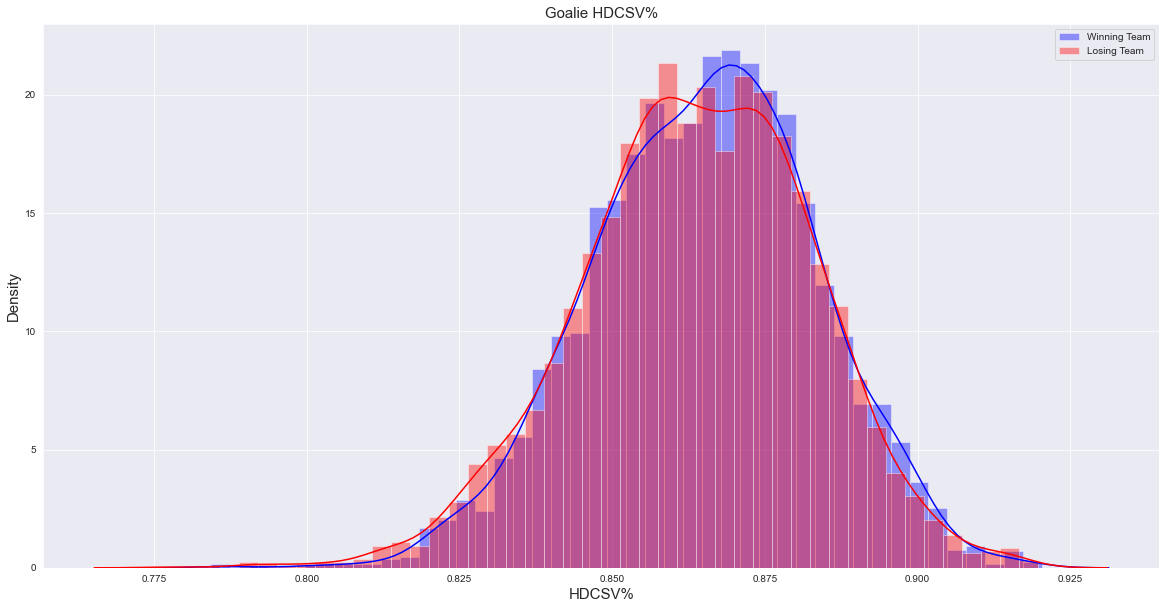

In [92]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df_winner[df_winner['winner_Goalie_HDCSV%'] != ig_HDCSV]['winner_Goalie_HDCSV%'], color = 'blue', label = 'Winning Team')
ax = sns.distplot(df_winner[df_winner['loser_Goalie_HDCSV%'] != ig_HDCSV]['loser_Goalie_HDCSV%'], color = 'red', label = 'Losing Team')

ax.set_title('Goalie HDCSV%', fontsize = 15)
ax.set_xlabel('HDCSV%', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()